<a href="https://colab.research.google.com/github/sarveshdabhade/MLDL-EXP-SSD/blob/main/MLDL_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

print("Imported necessary libraries for scaling and hierarchical clustering.")

# Assuming 'df' is your original DataFrame. If not, make sure it's loaded or defined.
# For demonstration, let's create a dummy df if it doesn't exist for the purpose of fixing the error.
# In a real scenario, df would come from previous steps.
if 'df' not in locals():
    print("Warning: 'df' not found. Creating a dummy DataFrame for demonstration.")
    data = {'Feature1': [10, 12, 11, 1, 3, 2, 20, 22, 21, 5, 7, 6],
            'Feature2': [1, 2, 1, 10, 11, 12, 0, 1, 0, 5, 6, 7]}
    df = pd.DataFrame(data)

# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Scaled the data using StandardScaler and created 'df_scaled'.")

# Calculate the linkage matrix
linkage_matrix = linkage(df_scaled, method='ward')
print("Calculated the linkage matrix using 'ward' method.")

# Apply AgglomerativeClustering (removed affinity='euclidean' for linkage='ward')
hierarchical_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['hierarchical_cluster'] = hierarchical_model.fit_predict(df_scaled)
print("Applied AgglomerativeClustering with 4 clusters and assigned labels to 'hierarchical_cluster' column.")

# Display the first few rows with the new cluster labels
print("First few rows with hierarchical cluster labels:")
print(df[['hierarchical_cluster']].head())

Imported necessary libraries for scaling and hierarchical clustering.
Scaled the data using StandardScaler and created 'df_scaled'.
Calculated the linkage matrix using 'ward' method.
Applied AgglomerativeClustering with 4 clusters and assigned labels to 'hierarchical_cluster' column.
First few rows with hierarchical cluster labels:
   hierarchical_cluster
0                     3
1                     3
2                     3
3                     1
4                     1


Imported matplotlib.pyplot for plotting and dendrogram from scipy.cluster.hierarchy.


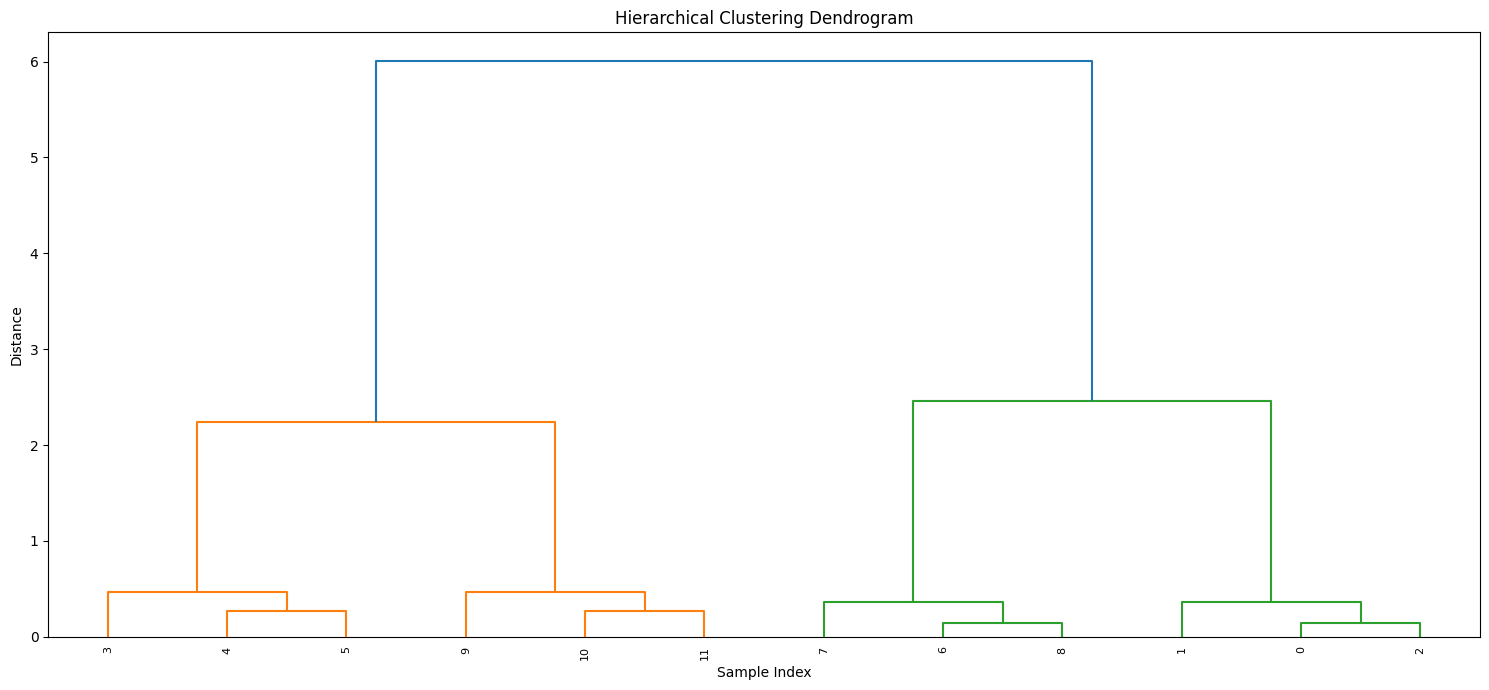

Dendrogram plotted successfully.


In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

print("Imported matplotlib.pyplot for plotting and dendrogram from scipy.cluster.hierarchy.")

# Plot the dendrogram
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.tight_layout()
plt.show()
print("Dendrogram plotted successfully.")

Imported matplotlib.pyplot for plotting.


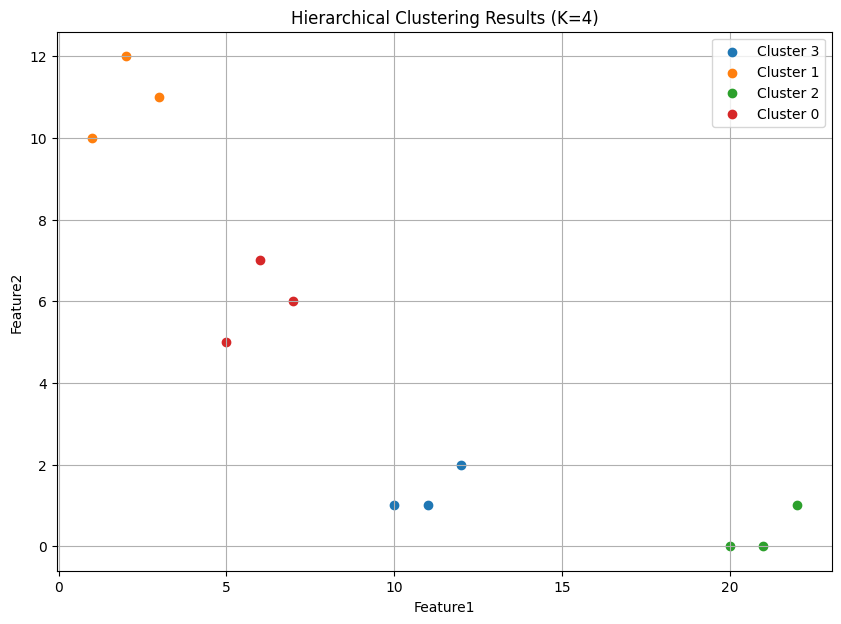

Hierarchical clustering scatter plot generated successfully.


In [5]:
import matplotlib.pyplot as plt

print("Imported matplotlib.pyplot for plotting.")

# Create the scatter plot
plt.figure(figsize=(10, 7))

# Get unique cluster labels
unique_clusters = df['hierarchical_cluster'].unique()

# Plot each cluster with a different color
for cluster_label in unique_clusters:
    cluster_data = df[df['hierarchical_cluster'] == cluster_label]
    plt.scatter(cluster_data['Feature1'], cluster_data['Feature2'], label=f'Cluster {cluster_label}')

# Add title and labels
plt.title('Hierarchical Clustering Results (K=4)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
print("Hierarchical clustering scatter plot generated successfully.")

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print("Imported make_blobs, KMeans, and matplotlib.pyplot.")

# Generate the sample dataset X
X, y_true = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)
print("Generated dataset X with 300 samples, 2 features, 4 centers, and random_state=42.")

# Display the first few rows of X to confirm data generation
print("First 5 rows of X:")
print(X[:5])

Imported make_blobs, KMeans, and matplotlib.pyplot.
Generated dataset X with 300 samples, 2 features, 4 centers, and random_state=42.
First 5 rows of X:
[[ -9.29768866   6.47367855]
 [ -9.69874112   6.93896737]
 [ -1.68665271   7.79344248]
 [ -7.09730839  -5.78133274]
 [-10.87645229   6.3154366 ]]


Imported matplotlib.pyplot for plotting.


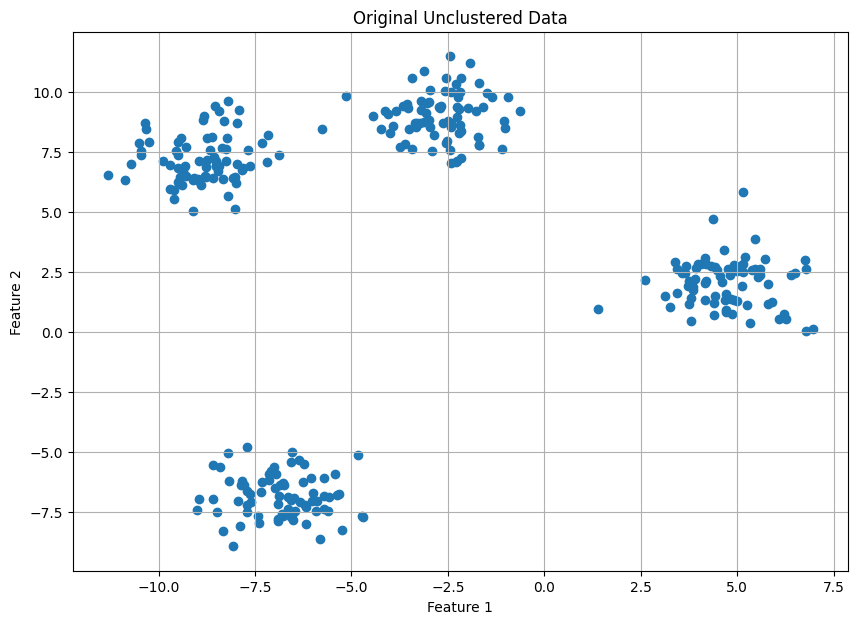

Original unclustered data scatter plot generated successfully.


In [7]:
import matplotlib.pyplot as plt

print("Imported matplotlib.pyplot for plotting.")

# Create a scatter plot of the original unclustered data X
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Unclustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
print("Original unclustered data scatter plot generated successfully.")

In [8]:
from sklearn.cluster import KMeans

print("Imported KMeans from sklearn.cluster.")

# Instantiate a KMeans model with n_clusters=4 and random_state=42
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit this model to the dataset X
kmeans.fit(X)
print("KMeans model instantiated and fitted to the dataset X.")

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_
print("K-Means cluster labels extracted.")

# Get the coordinates of the cluster centroids
kmeans_centers = kmeans.cluster_centers_
print("K-Means cluster centroids extracted.")

# Display the first few cluster labels and centroids to confirm
print("\nFirst 5 K-Means cluster labels:")
print(kmeans_labels[:5])
print("\nK-Means cluster centroids:")
print(kmeans_centers)

Imported KMeans from sklearn.cluster.
KMeans model instantiated and fitted to the dataset X.
K-Means cluster labels extracted.
K-Means cluster centroids extracted.

First 5 K-Means cluster labels:
[3 3 0 1 3]

K-Means cluster centroids:
[[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


Imported matplotlib.pyplot for plotting.


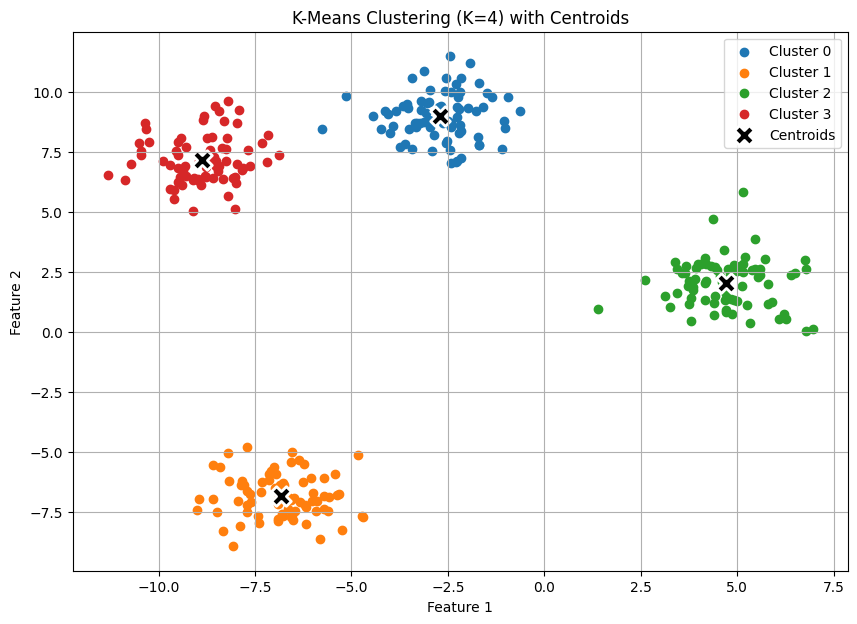

K-Means clustered data scatter plot with centroids generated successfully.


In [9]:
import matplotlib.pyplot as plt

print("Imported matplotlib.pyplot for plotting.")

# Create a new scatter plot for K-Means clustered data
plt.figure(figsize=(10, 7))

# Plot each cluster with a different color
for i in range(len(kmeans_centers)):
    # Select data points belonging to the current cluster
    cluster_data = X[kmeans_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

# Overlay the cluster centroids
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1],
            marker='X', s=200, color='black', label='Centroids',
            edgecolors='white', linewidths=2)

# Add title and labels
plt.title('K-Means Clustering (K=4) with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
print("K-Means clustered data scatter plot with centroids generated successfully.")

Imported necessary libraries for hierarchical clustering and plotting.
Calculated the linkage matrix for X using 'ward' method.
Applied AgglomerativeClustering with 4 clusters and obtained labels for X.


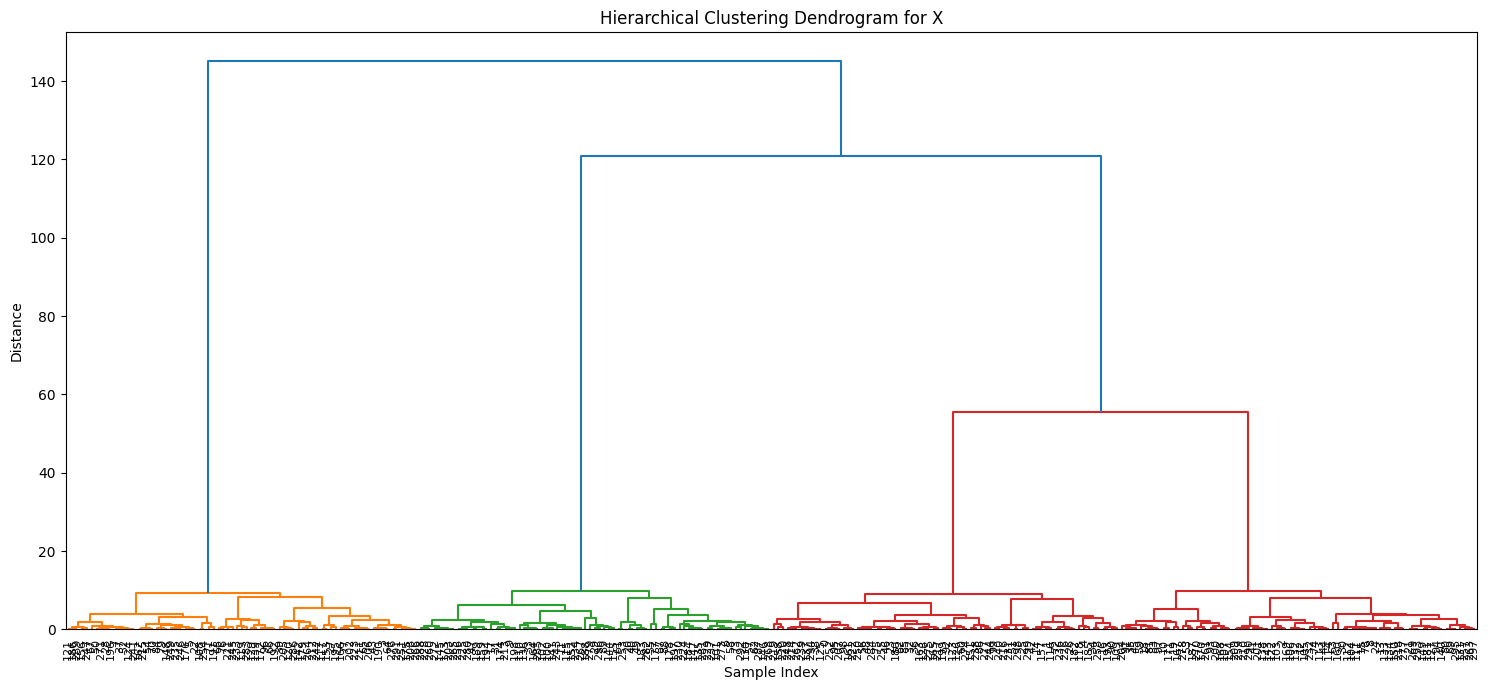

Dendrogram for X plotted successfully.


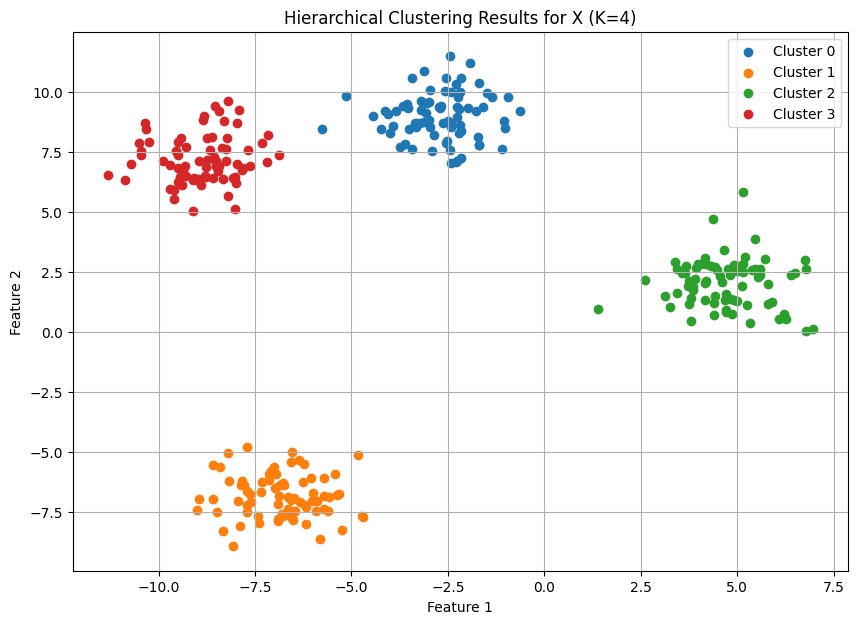

Hierarchical clustering scatter plot for X generated successfully.


In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

print("Imported necessary libraries for hierarchical clustering and plotting.")

# 1. Calculate the linkage matrix for the X dataset
linkage_matrix_X = linkage(X, method='ward')
print("Calculated the linkage matrix for X using 'ward' method.")

# 2. Instantiate an AgglomerativeClustering model
hierarchical_model_X = AgglomerativeClustering(n_clusters=4, linkage='ward')

# 3. Fit the AgglomerativeClustering model to the X dataset and predict the cluster labels
hierarchical_labels_X = hierarchical_model_X.fit_predict(X)
print("Applied AgglomerativeClustering with 4 clusters and obtained labels for X.")

# 4. Generate a dendrogram plot
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram for X')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix_X, leaf_rotation=90., leaf_font_size=8.)
plt.tight_layout()
plt.show()
print("Dendrogram for X plotted successfully.")

# 5. Create a scatter plot to visualize the hierarchical clustering results on the X dataset
plt.figure(figsize=(10, 7))

# Get unique cluster labels
unique_hierarchical_clusters_X = sorted(list(set(hierarchical_labels_X)))

# Plot each cluster with a different color
for cluster_label in unique_hierarchical_clusters_X:
    cluster_data_X = X[hierarchical_labels_X == cluster_label]
    plt.scatter(cluster_data_X[:, 0], cluster_data_X[:, 1], label=f'Cluster {cluster_label}')

# 6. Add title, labels, and legend
plt.title('Hierarchical Clustering Results for X (K=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
print("Hierarchical clustering scatter plot for X generated successfully.")